<---------------->BIENVENUE DANS NOTRE PROJET DE DECOUVERTE ET D'INITIALISATION
 EN PYTHON POUR L'ANALYSE DE DONNEES AVEC DES LIBRAIRIES COMME PANDAS, FOLIUM, NETWORKX, MATPLOTLIB et CSV
VOUS POUVEZ EXECUTER TOUTES LES CELLULES D'UN COUP!<-------------->

<---------------->Bibliothéque pandas pour lire le fichier transport-nodes.csv<-------------->

                  id   latitude  longitude  population
0          Amsterdam  52.379189   4.899431      821752
1            Utrecht  52.092876   5.104480      334176
2          Rotterdam  51.922500   4.479170      623652
3           Den Haag  52.078663   4.288788      514861
4          Immingham  53.612390  -0.222190        9642
5          Doncaster  53.522850  -1.131160      302400
6             London  51.509865  -0.118092     8787892
7   Hoek van Holland  51.977500   4.133330        9382
8         Felixstowe  51.963750   1.351100       23689
9         Colchester  51.889210   0.904210      104390
10           Ipswich  52.059170   1.155450 

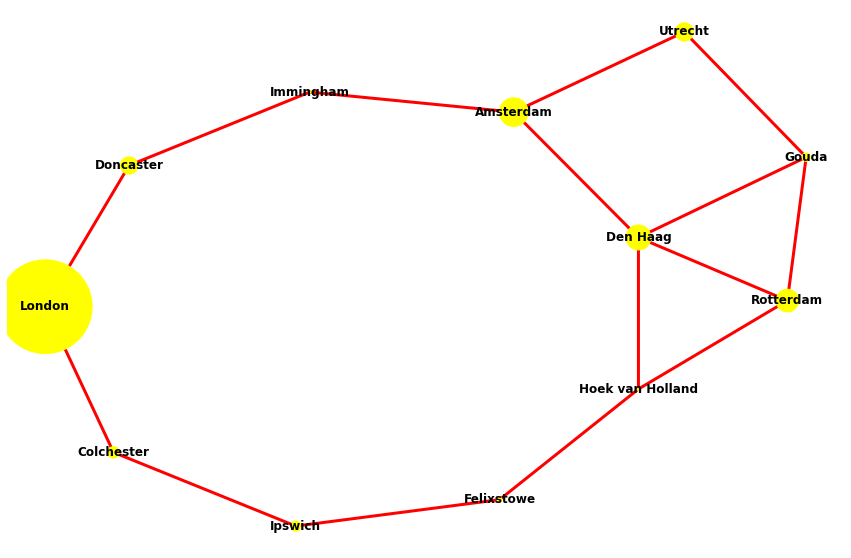

In [42]:
#Chargement des librairies Pandas, Network et folium
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
import csv 
import folium

%matplotlib inline

""" PARTIE 1 NETWORKX AND FOLIUM SECTIONS """
print("<---------------->BIENVENUE DANS NOTRE PROJET DE DECOUVERTE ET D'INITIALISATION\n EN PYTHON POUR L'ANALYSE DE DONNEES AVEC DES LIBRAIRIES COMME PANDAS, FOLIUM, NETWORKX, MATPLOTLIB et CSV\nVOUS POUVEZ EXECUTER TOUTES LES CELLULES D'UN COUP!<-------------->\n")

print("<---------------->Bibliothéque pandas pour lire le fichier transport-nodes.csv<-------------->\n")
print(pd.read_csv("transport-nodes.csv", sep=","), "\n")
print("<---------------->Bibliothéque pandas pour lire le fichier transport-relationships.csv<-------------->\n")
print(pd.read_csv("transport-relationships.csv", sep=","), "\n")

input_data_nodes = pd.read_csv('transport-nodes.csv', sep=",")
input_data_edges = pd.read_csv('transport-relationships.csv', sep=",")
# Setting id index on transport-nodes file and transforming datas into DataFrames format
input_data_nodes = input_data_nodes.set_index("id")
data_nodes = pd.DataFrame(input_data_nodes)
data_edges = pd.DataFrame(input_data_edges)

# Building a graph from data edges list with networkx
edge_Graph = nx.from_pandas_edgelist(df=data_edges, source="src", edge_attr=True, target="dst")
fig, ax = plt.subplots(figsize=(15,10))
myGraph = nx.Graph(edge_Graph)

# Adding latitude, longitude and population attributes on the nodes
def ajouterAttribut(graph, nameAttribute, dfNode, index):
    nx.set_node_attributes(graph, name=nameAttribute, values=dfNode[nameAttribute])

ajouterAttribut(graph=myGraph,nameAttribute="latitude", dfNode=data_nodes, index="id")
ajouterAttribut(graph=myGraph,nameAttribute="longitude", dfNode=data_nodes, index="id")
ajouterAttribut(graph=myGraph,nameAttribute="population", dfNode=data_nodes, index="id")
print("<--------------->Affichage des noeuds et de leurs attributs sous forme de dictionnaire<--------------->\n")
print(dict(myGraph.nodes.data()), "\n")
# And array of node sizes according to the population's attribute
nodes_size = []
for i in data_nodes.population:
    nodes_size.append(int(i/1000))

# Drawing the graph
nx.draw_kamada_kawai(G=myGraph, with_labels=True ,node_size=nodes_size,node_color='yellow', font_weight="bold", edge_color="Red", width=3)

# Making a map for each node's longitude and latitude 
for i in myGraph.nodes:
    basemap = folium.Map(location=[myGraph.nodes[i]['latitude'], myGraph.nodes[i]['longitude']], zoom_start=7, tiles="Stamen Terrain")
basemap

# Putting icon markers in the map 
def marker(g):
    tooltip = "Click me!"
    for i in g.nodes:
        folium.Marker(
            location=[g.nodes[i]['latitude'], g.nodes[i]['longitude']], popup="<b>"+i+"</b>", tooltip=tooltip, icon = folium.Icon(color="red", icon="fa-map-marker",prefix="fa")
        ).add_to(basemap)
    return basemap
marker(myGraph)

# A list of points from each node's attribute and one of its neighbors
def construirePointsImage(graph):
    points = []
    for i in graph.nodes:
        for neighbor in graph.neighbors(i):
            points.append([graph.nodes[i]['latitude'], graph.nodes[i]['longitude']])
            points.append([graph.nodes[neighbor]['latitude'], graph.nodes[neighbor]['longitude']])
    return points

coordonneesvoisins = construirePointsImage(myGraph)
print("<--------------->Coordonnées des noeuds et de leurs voisins<-----------------> \n\n",coordonneesvoisins, "\n")

# Visualizing the map with PolyLines from the list of points

print("<--------------->Visualisation de la carte avec marqueurs et les arcs et dessin du Graphe<--------------->")
def visualiserFolium(graph, points, locationpardefaut=[51.509865, -0.118092], tiles="Stamen Toner", explored=None):
    folium.PolyLine(locations=points, color="red", weight=2.5, opacity=1).add_to(basemap)
    basemap.save("mapMarker.html")
    return basemap

visualiserFolium(myGraph, coordonneesvoisins)

In [43]:
'''PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile

Implementer la classe Noeud
Un noeud a un nom
Un noeud a des attributs sous forme de dictionnaire python avec comme cle: une liste de coordonnes (latitude, longitude), 
la taille de la population
La liste des voisins sera initialisée à la création des arcs dans le graphe
'''
print("<------------------->PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile\nPour une meilleure visualisation des resultats veuillez executer les fonction une par une<----------------->\n")

class Noeud:
    def __init__(self,name):
        self.name=name
        self.attributs={}
        self.listeNomVoisin=[]

    def setAttribut(self,key,values):
        self.attributs[key]=values
    
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    
    '''   Deux noeuds sont egaux s'ils ont même nom   '''
    def egal(self,noeud):
        return self.getName()==noeud.getName()
    
    def getCoutMin(self):
        return min(self.getAttribut["population"])
    
    def getCout(self,noeud):
        return self.getAttribut("population")[noeud]
    
'''Implementation la classe Graphe
Les noeuds des graphes doivent être initialisé à l'aide du fichier transport-node.csv
Les arcs des graphes doivent être initialisé à l'aide du fichier transport-relations.csv
On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
On doit avoir la liste des noeuds voisins d'un noeud donné. 
Le graphe est non orienté donc le voisinage est reciproque

'''
class Graphe:
    ''' Les noeuds seront mis dans une liste   
        Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds=[]
        self.arcs={}
    
    '''   Creer les noeuds avec un fichier csv   
          On peut mettre tous les noeuds dans une liste   
          On doit attribuer à chaque noeud ses attributs: latitude, longitude, population   
          On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide   
    '''
    def creerNoeuds(self,fichiercsv):
        try:
            with open(fichiercsv, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    self.noeuds.append(Noeud(row[0]))
                    self.noeuds[-1].setAttribut("latitude", row[1])
                    self.noeuds[-1].setAttribut("longitude", row[2])
                    self.noeuds[-1].setAttribut("population", row[3])
                    self.arcs[row[0]]=[]
        except:
            print("Erreur lors de la lecture du fichier")
    
    '''   Creer les arcs avec un  fichier csv  
          Utilisez un dictionnaire pour les arcs   
          N'oubliez pas que le graphe est non oriente.   
          Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)     
    '''
    def creerArc(self,fichierarcs):
        arc = []
        try:
            with open(fichierarcs, 'r') as f:
                reader = csv.DictReader(f)
                for row in reader:
                    arc.append(row)
                self.arcs = arc
        except:
            print("Erreur lors de la lecture du fichier")
    
    '''  Retrouver un noeud à partir de son nom '''
    def getNoeud(self,nom):
        for noeud in self.noeuds:
            if noeud.getName()==nom:
                return noeud
        raise Exception("Le noeud n'existe pas")
    
    '''   Trouver les noeuds voisins d'un noeud donne   '''
    def getVoisins(self,noeud):
        return [voisin for voisin in myGraph.neighbors(noeud)]
    
    '''   Recuperer pour un noeud donne les latitudes et longitudes de ses voisins   
          Constituer des pairs de listes de coordonnées entre le point et ses voisins   
          pour une representation sous folium   
    '''
    def getCoordonnesVoisins(self,noeud):
        coordonneesvoisins=[]
        for voisin in self.getVoisins(noeud):
            coordonneesvoisins.append(
                [
                    (self.getNoeud(voisin).getAttribut("latitude"),
                    self.getNoeud(voisin).getAttribut("longitude")),
                    (self.getNoeud(voisin).getAttribut("latitude"),self.getNoeud(voisin).getAttribut("longitude"))
                ]
            )
            
        return coordonneesvoisins
    
    '''   Recuperer les coordonnees d'une liste de noeuds pour visualiser sous folium   
          Prend en entrée une liste de nom de noeud   
          Retourne une liste de sous-listes à deux elements de coordonnées   
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coordonnees=[]
        for noeud in listeNoeuds:
            coordonnees.append([(self.getNoeud(noeud).getAttribut("latitude"),self.getNoeud(noeud).getAttribut("longitude"))])
        return coordonnees
    
    '''   Visualiser les noeuds et les arcs sous folium   
          Entree: le parametre explored sera utilisé pour les parcours de graphe   
    '''
    def visualiserFolium(self,locationpardefaut=[52.3791890,4.899431],tiles='Stamen Toner',explored=None):
        '''   Visualise le graphe en folium   '''
        m=folium.Map(location=locationpardefaut,tiles=tiles, zoom_start=7)
        # On recupere les noeuds a partir de l'index 1 car l'index 0 est reservé pour l'id 
        for noeud in self.noeuds[1:]:
            if explored is not None:
                if noeud.getName() in explored:
                    folium.Marker(
                        location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                        popup=noeud.getName(),
                        icon=folium.Icon(color='green')
                    ).add_to(m)
                else:
                    folium.Marker(
                        location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                        popup=noeud.getName(),
                        icon=folium.Icon(color='red')
                    ).add_to(m)
            else:
                folium.Marker(
                    location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                    popup=noeud.getName(),
                    icon=folium.Icon(color='red')
                ).add_to(m)
        folium.PolyLine(locations=coordonneesvoisins, color="red", weight=2.5, opacity=1).add_to(m)
        m.save('mapMarkerExplored.html')
        return m

G=Graphe()
G.creerNoeuds("transport-nodes.csv")
G.creerArc("transport-relationships.csv")

print("<------------------->Liste des noeuds du graphe<----------------->\n")
for noeud in G.noeuds:
    print(noeud.getName())
    
print("<------------------->Liste des voisins de London<----------------->\n")
print(G.getVoisins("London"))
print("<------------------->Liste des coordonnees des noeuds de la liste<----------------->\n")
print(G.getListeCoordonnees(["London","Gouda"]))

<------------------->PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile
Pour une meilleure visualisation des resultats veuillez executer les fonction une par une<----------------->

<------------------->Liste des noeuds du graphe<----------------->

id
Amsterdam
Utrecht
Rotterdam
Den Haag
Immingham
Doncaster
London
Hoek van Holland
Felixstowe
Colchester
Ipswich
Gouda
<------------------->Liste des voisins de London<----------------->

['Doncaster', 'Colchester']
<------------------->Liste des coordonnees des noeuds de la liste<----------------->

[[('51.509865', '-0.118092')], [('52.01667', '4.70833')]]


In [44]:
print("<------------------->Liste des arcs du graphe<----------------->\n")
print(G.arcs)

<------------------->Liste des arcs du graphe<----------------->

[{'src': 'Amsterdam', 'dst': 'Utrecht', 'relationship': 'EROAD', 'cost': '46'}, {'src': 'Amsterdam', 'dst': 'Den Haag', 'relationship': 'EROAD', 'cost': '59'}, {'src': 'Den Haag', 'dst': 'Rotterdam', 'relationship': 'EROAD', 'cost': '26'}, {'src': 'Amsterdam', 'dst': 'Immingham', 'relationship': 'EROAD', 'cost': '369'}, {'src': 'Immingham', 'dst': 'Doncaster', 'relationship': 'EROAD', 'cost': '74'}, {'src': 'Doncaster', 'dst': 'London', 'relationship': 'EROAD', 'cost': '277'}, {'src': 'Hoek van Holland', 'dst': 'Den Haag', 'relationship': 'EROAD', 'cost': '27'}, {'src': 'Felixstowe', 'dst': 'Hoek van Holland', 'relationship': 'EROAD', 'cost': '207'}, {'src': 'Ipswich', 'dst': 'Felixstowe', 'relationship': 'EROAD', 'cost': '22'}, {'src': 'Colchester', 'dst': 'Ipswich', 'relationship': 'EROAD', 'cost': '32'}, {'src': 'London', 'dst': 'Colchester', 'relationship': 'EROAD', 'cost': '106'}, {'src': 'Gouda', 'dst': 'Rotterdam'

In [45]:
print("<------------------->Liste des coordonnees des voisins de Amsterdam<----------------->\n")
print(G.getCoordonnesVoisins("Amsterdam"))

<------------------->Liste des coordonnees des voisins de Amsterdam<----------------->

[[('52.092876', '5.104480'), ('52.092876', '5.104480')], [('52.078663', '4.288788'), ('52.078663', '4.288788')], [('53.61239', '-0.22219'), ('53.61239', '-0.22219')]]


In [46]:
print("<------------------->Visualisation du graphe en folium<----------------->\n")
G.visualiserFolium()

<------------------->Visualisation du graphe en folium<----------------->



In [47]:
'''
Partie 3 : Implementer les classes File et Pile en utilisant les listes en python
'''
class Pile:
    def __init__(self):
        self.elements=[]

    def push(self,element):
        self.elements.append(element)
    
    '''   Retourne True si  un noeud est dans la pile   '''
    def contains_noeud(self,noeud):
        return noeud in self.elements
        
    '''   Retourne true si la pile est vide   '''
    def empty(self):
        return len(self.elements)==0

    '''   Retourne et supprime l'element en tete de pile   
         Retourne une exception si la pile est vide   '''
    def remove(self):
        if len(self.elements) == 0:
            raise Exception("La pile est vide")
        return self.elements.pop()

#Implémentation de la classe File par héritage
class File(Pile):
    def __init__(self):
        super().__init__()
    
    '''   Retourne et supprime l'element en tete de file   
         Retourne une exception si la file est vide   '''
    def remove(self):
        if self.empty():
            raise Exception("La file est vide")
        return self.elements.pop(0)

print("<------------------>Test des structures de données Pile et File<------------------->\n")
f=Pile()
f.push("Mamadou")
f.push("Mansour")
f.push("Dame")
f.push("Khady")
print(f.elements)
print("<----------------->L'élément recemmenet ajouté de la liste sera enlevé<----------------->\n")
f.remove()
print(f.elements)
p=File()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
print("<---------------->Le premier élément de la liste sera enlevé<---------------->\n")
p.remove()
print(p.elements)

<------------------>Test des structures de données Pile et File<------------------->

['Mamadou', 'Mansour', 'Dame', 'Khady']
<----------------->L'élément recemmenet ajouté de la liste sera enlevé<----------------->

['Mamadou', 'Mansour', 'Dame']
['Mamadou', 'Mansour', 'Dame', 'Khady']
<---------------->Le premier élément de la liste sera enlevé<---------------->

['Mansour', 'Dame', 'Khady']


In [48]:
''' PARTIE 4 : Parcours en profondeur iteratif d'un graphe entre un noeudSRC et un noeudDST '''

'''Implémenter le parcours en profondeur non recursif entre deux noeudsPrend en parametre:
    - un graphe- un noeud source
    - un noeud destination
    Output:une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
'''
def parcoursDFS(graphe, noeudSRC, noeudDST):
    frontiere = Pile()
    listeNoeudVisite = File()

    frontiere.push(noeudSRC)
    if noeudSRC == noeudDST:
        return [noeudSRC]
    tailleFrontiere = len(frontiere.elements)
    noeudCourant = frontiere.elements[tailleFrontiere - 1]

    dernierNoeudVisite = noeudCourant

    while noeudCourant != noeudDST:
        extractNoeud = frontiere.remove()
        # Récupèration des noeuds voisins de cet noeud qu'on vient d'extraire
        noeud = Noeud(extractNoeud)
        listeVoisins = graphe.getVoisins(extractNoeud)
        #----------------
        listeNoeudVisite.push(extractNoeud)
        for noeud in listeVoisins:
            if (frontiere.contains_noeud(noeud) == False) and (listeNoeudVisite.contains_noeud(noeud) == False):
                frontiere.push(noeud)
        tailleFrontiere = len(frontiere.elements)
        noeudCourant = frontiere.elements[tailleFrontiere - 1] 
        dernierNoeudVisite = noeudCourant
    '''     Aprés avoir sortie la boucle on doit ajouter le dernier visité
            à la liste des noeuds visités car cet ajout ne s'effectue pas avec la
            boucle While
    '''
    listeNoeudVisite.push(dernierNoeudVisite) 
    return listeNoeudVisite.elements
print("<------------------->Parcours en profondeur entre deux noeuds (London et Gouda)<----------------->\n")
parcoursDFS(G,"London", "Gouda")

<------------------->Parcours en profondeur entre deux noeuds (London et Gouda)<----------------->



['London',
 'Colchester',
 'Ipswich',
 'Felixstowe',
 'Hoek van Holland',
 'Rotterdam',
 'Gouda']

In [49]:
print("<------------------->Visualisation de la carte avec marqueur en vert des noeuds parcourus<----------------->\n")
G.visualiserFolium(explored=list(parcoursDFS(G,'London','Gouda')))

<------------------->Visualisation de la carte avec marqueur en vert des noeuds parcourus<----------------->

